In [6]:
import pandas as pd
df = pd.read_csv("voice.csv")
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [7]:
df.shape

(3168, 21)

### Checking for NULL Values

In [8]:
df.isnull().sum()         

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [9]:
df['label'].value_counts()

male      1584
female    1584
Name: label, dtype: int64

In [10]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]
print(x.shape)
print(y.shape)

(3168, 20)
(3168,)


In [10]:
df.duplicated().sum()

2

### Removing Duplicate Values

In [11]:
df.drop_duplicates(keep=False,inplace=True)

In [12]:
df.duplicated().sum()

0

### Pie Chart

In [13]:
import matplotlib.pyplot as plt

<AxesSubplot:ylabel='label'>

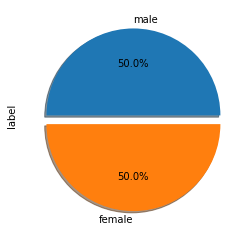

In [15]:
gender = df["label"]
df.nunique().sort_values()
df['label'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',shadow=True)

In [16]:
from sklearn.model_selection import train_test_split

## Spliting testing and training data

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2534, 20)
(634, 20)
(2534,)
(634,)


In [19]:
x_train.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
1222,0.196316,0.063697,0.175053,0.138938,0.262580,0.123642,2.234222,7.913539,0.871228,0.331613,0.135539,0.196316,0.140195,0.046967,0.275862,1.558815,0.023438,5.390625,5.367188,0.166453
842,0.174892,0.055032,0.183887,0.119373,0.207147,0.087774,2.040028,7.880566,0.905661,0.351681,0.201442,0.174892,0.112162,0.046921,0.277457,1.005632,0.023438,7.031250,7.007812,0.087485
1026,0.211378,0.056150,0.234653,0.174550,0.254807,0.080257,2.466231,10.139554,0.894457,0.303314,0.247249,0.211378,0.122820,0.047198,0.279070,0.849420,0.023438,5.062500,5.039062,0.103193
2784,0.188624,0.038734,0.183567,0.166002,0.209053,0.043050,1.995436,6.648678,0.874534,0.277482,0.175301,0.188624,0.157433,0.049434,0.275862,1.081108,0.023438,7.265625,7.242188,0.130394
225,0.174806,0.061149,0.198207,0.117063,0.223308,0.106244,2.522161,11.762188,0.920326,0.480294,0.223308,0.174806,0.105128,0.015779,0.231884,0.493490,0.007812,2.765625,2.757812,0.204582


## Applying Decision Tree Classifier

In [22]:
from sklearn.tree import DecisionTreeClassifier

In [62]:
m1 = DecisionTreeClassifier(criterion='gini',max_depth=9)
m1.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=9)

In [49]:
# Accuracy
print("Training Score",m5.score(x_train,y_train))
print("Testing Score",m5.score(x_test,y_test))

Training Score 0.9238358326756116
Testing Score 0.9069400630914827


In [26]:
ypred_m1 = m1.predict(x_test)

In [28]:
from sklearn.metrics import confusion_matrix,classification_report

### Confusion matrix and Classification report

In [29]:
cm_m1 = confusion_matrix(y_test,ypred_m1)
print(cm_m1)
print(classification_report(y_test,ypred_m1))

[[310  12]
 [ 14 298]]
              precision    recall  f1-score   support

      female       0.96      0.96      0.96       322
        male       0.96      0.96      0.96       312

    accuracy                           0.96       634
   macro avg       0.96      0.96      0.96       634
weighted avg       0.96      0.96      0.96       634



## Applying Random Forest Classifier

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
m2 = RandomForestClassifier(n_estimators=45, criterion='entropy',max_depth=8,min_samples_split=12) 
m2.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=8, min_samples_split=12,
                       n_estimators=45)

In [48]:
# Accuracy
print("Training Score",m5.score(x_train,y_train))
print("Testing Score",m5.score(x_test,y_test))

Training Score 0.9238358326756116
Testing Score 0.9069400630914827


In [33]:
ypred_m2 = m2.predict(x_test)

### Confusion matrix and Classification report

In [34]:
cm_m2 = confusion_matrix(y_test,ypred_m2)
print(cm_m2)
print(classification_report(y_test,ypred_m2,zero_division=0))

[[316   6]
 [  6 306]]
              precision    recall  f1-score   support

      female       0.98      0.98      0.98       322
        male       0.98      0.98      0.98       312

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



## Applying KNN Classifier

In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [70]:
m3 = KNeighborsClassifier(n_neighbors=91)
m3.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=91)

In [47]:
# Accuracy
print("Training Score",m5.score(x_train,y_train))
print("Testing Score",m5.score(x_test,y_test))

Training Score 0.9238358326756116
Testing Score 0.9069400630914827


In [38]:
ypred_m3 = m3.predict(x_test)

### Confusion matrix and Classification report

In [39]:
cm_m3 = confusion_matrix(y_test,ypred_m3)
print(cm_m3)
print(classification_report(y_test,ypred_m3,zero_division=0))

[[202 120]
 [ 86 226]]
              precision    recall  f1-score   support

      female       0.70      0.63      0.66       322
        male       0.65      0.72      0.69       312

    accuracy                           0.68       634
   macro avg       0.68      0.68      0.67       634
weighted avg       0.68      0.68      0.67       634



## Applying LogisticRegression Classifier

In [40]:
from sklearn.linear_model import LogisticRegression

In [64]:
m4 = LogisticRegression(solver='liblinear')
m4.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

In [46]:
# Accuracy
print("Training Score",m5.score(x_train,y_train))
print("Testing Score",m5.score(x_test,y_test))

Training Score 0.9238358326756116
Testing Score 0.9069400630914827


In [42]:
ypred_m4 = m4.predict(x_test)

### Confusion matrix and Classification report

In [43]:
cm_m4 = confusion_matrix(y_test,ypred_m4)
print(cm_m4)
print(classification_report(y_test,ypred_m4,zero_division=0))

[[265  57]
 [ 10 302]]
              precision    recall  f1-score   support

      female       0.96      0.82      0.89       322
        male       0.84      0.97      0.90       312

    accuracy                           0.89       634
   macro avg       0.90      0.90      0.89       634
weighted avg       0.90      0.89      0.89       634



## Applying SVM Classifier

In [44]:
from sklearn.svm import SVC

In [65]:
m5 = SVC(kernel='linear',C=1)
m5.fit(x_train,y_train)

SVC(C=1, kernel='linear')

In [50]:
# Accuracy
print("Training Score",m5.score(x_train,y_train))
print("Testing Score",m5.score(x_test,y_test))

Training Score 0.9238358326756116
Testing Score 0.9069400630914827


In [51]:
ypred_m5 = m5.predict(x_test)

### Confusion matrix and Classification report

In [52]:
cm_m5 = confusion_matrix(y_test,ypred_m5)
print(cm_m5)
print(classification_report(y_test,ypred_m5,zero_division=0))

[[269  53]
 [  6 306]]
              precision    recall  f1-score   support

      female       0.98      0.84      0.90       322
        male       0.85      0.98      0.91       312

    accuracy                           0.91       634
   macro avg       0.92      0.91      0.91       634
weighted avg       0.92      0.91      0.91       634

